In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('C:/Users/Chaitanya/Downloads/Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop(columns=['Cabin'],inplace=True)
df.drop(columns=['Name'], inplace=True)
df.drop(columns=['Ticket'],inplace=True)

df.isnull().sum()


C:\Users\Chaitanya\AppData\Local\Temp\ipykernel_4964\1629735084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\Chaitanya\AppData\Local\Temp\ipykernel_4964\1629735084.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

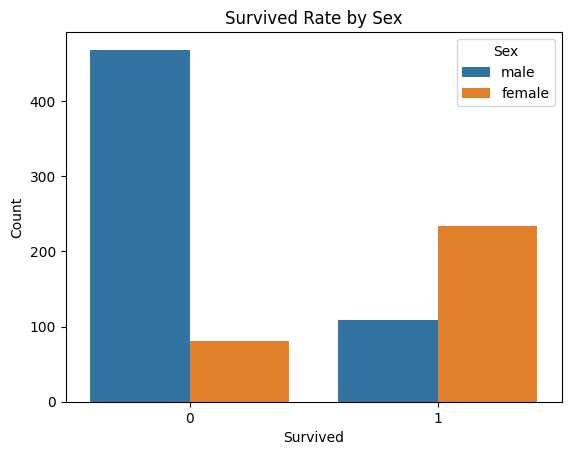

In [6]:
sns.countplot(data=df, x='Survived',hue='Sex')
plt.title('Survived Rate by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

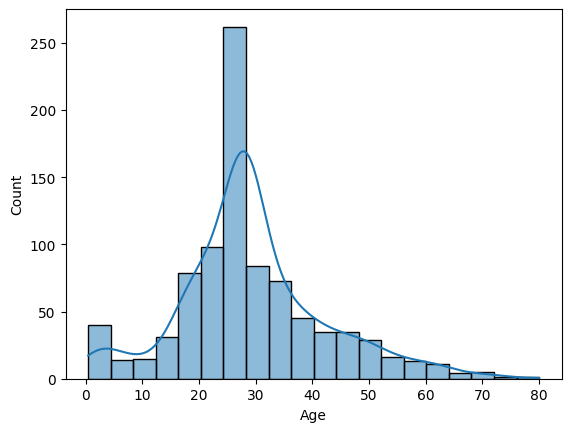

In [7]:
sns.histplot(df['Age'],bins=20,kde=True)

<Axes: >

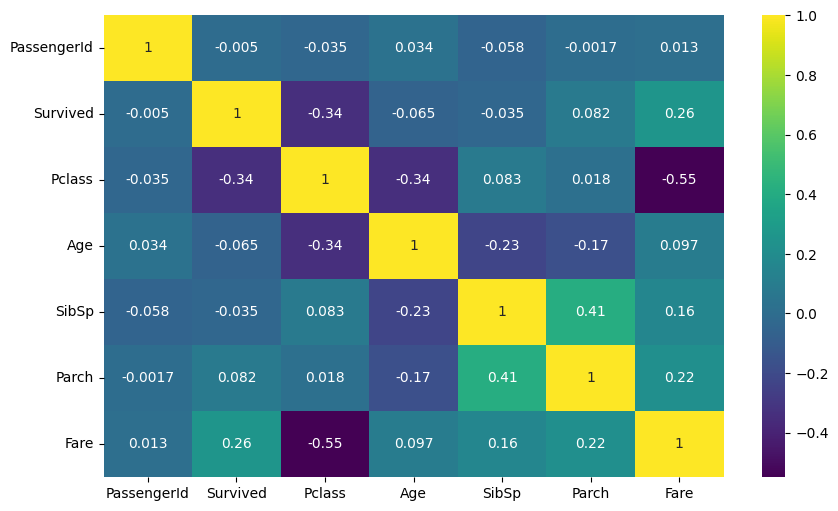

In [8]:
numeric = df.select_dtypes(include=[np.number])
corr_matrix = numeric.corr()
plt.figure(figsize=(10,6))
sns.heatmap(numeric.corr(),cmap='viridis', annot=True)

<Axes: xlabel='Age', ylabel='Fare'>

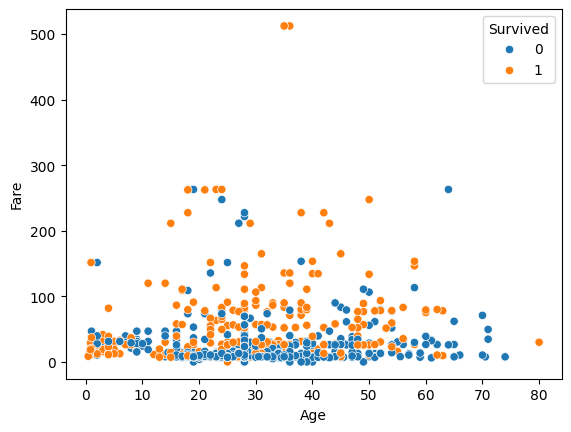

In [9]:
sns.scatterplot(x='Age',y='Fare', data=df, hue='Survived')

In [10]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})


In [11]:
import pickle
X = df.drop('Survived',axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler,scaler_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

#Logistic Regression
log_model = LogisticRegressionCV()
log_model.fit(X_train, y_train)

y_pred_log_reg = log_model.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_log_matrix = confusion_matrix(y_test, y_pred_log_reg)
classification_log = classification_report(y_test, y_pred_log_reg)

print(f'Logistic Regression Accuracy: {accuracy_log_reg: 2f}')
print('Confusion Matrix')
print(conf_log_matrix)
print('classification_report')
print(classification_log)


Logistic Regression Accuracy:  0.793296
Confusion Matrix
[[89 16]
 [21 53]]
classification_report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


In [13]:
#Decision Tree
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

print(f'Decision Tree Accuracy: {accuracy_tree: 2f}')
print('Confusion Matrix')
print(conf_matrix_tree)
print('classification Report')
print(class_report_tree)


Decision Tree Accuracy:  0.776536
Confusion Matrix
[[87 18]
 [22 52]]
classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [14]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(n_estimators=100)
random_clf.fit(X_train, y_train)

y_pred_rf = random_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy score: {accuracy_rf: .2f}')
print('Confusion Matrix')
print(conf_matrix_rf)
print('Classification Report')
print(class_report_rf)

Accuracy score:  0.83
Confusion Matrix
[[92 13]
 [18 56]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [15]:
#KNN Neighbours

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f'Accuracy:{accuracy_knn:.2f}')
print('Confusion Matrix')
print(conf_matrix_knn)
print('classification_report')
print(class_report_knn)

Accuracy:0.81
Confusion Matrix
[[91 14]
 [20 54]]
classification_report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [16]:

from sklearn import svm
import pickle

supp_vect = svm.SVC()
supp_vect.fit(X_train, y_train)

y_predd_svm = supp_vect.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_predd_svm)
conf_matrix_svm = confusion_matrix(y_test,y_predd_svm)
class_report_svm = classification_report(y_test,y_pred_knn)

print(f'SVM Accuaracy: {accuracy_svm: .2f}')
print('confusion_matrix')
print(conf_matrix_svm)
print(classification_report)
print(class_report_svm)

filname = 'model.pickle'
pickle.dump(supp_vect, open(filname, 'wb'))
loaded_model = pickle.load(open(filname, 'rb'))

SVM Accuaracy:  0.82
confusion_matrix
[[92 13]
 [20 54]]
<function classification_report at 0x000001F5369CCC20>
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [17]:
import pickle
import numpy as np

def infer_titanic_survival(model_path, scaler_path, input_features):
    """
    Perform inferencing on the Titanic dataset.
    
    Parameters:
    - model_path (str): Path to the saved model pickle file.
    - scaler_path (str): Path to the saved scaler pickle file.
    - input_features (list): List of input features in the order:
      [PassengerId, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
      
    Returns:
    - str: "Survived" or "Not Survived" based on model prediction.
    """
    try:
        # Load the trained model and scaler
        with open(r'C:\Users\Chaitanya\Desktop\Data Science\Data_Science\model.pickle', 'rb') as model_file:
            model = pickle.load(model_file)
        
        with open(r'C:\Users\Chaitanya\Desktop\Data Science\Data_Science\scaler.pkl', 'rb') as scaler_file:
            scaler = pickle.load(scaler_file)
        
        # Ensure the input features are in the correct format
        input_array = np.array([input_features]).reshape(1, -1)
        
        # Scale the input features
        scaled_input = scaler.transform(input_array)
        
        # Predict survival
        prediction = model.predict(scaled_input)
        
        # Return result
        return "Survived" if prediction[0] == 1 else "Not Survived"
    
    except Exception as e:
        return f"An error occurred: {e}"


In [18]:
#  - input_features (list): List of input features in the following order:
      
#         - PassengerId (int): Unique ID of the passenger.
#         - Pclass (int): Passenger class (1 = First, 2 = Second, 3 = Third).
#         - Sex (int): Gender of the passenger (0 = Male, 1 = Female).
#         - Age (float): Age of the passenger.
#         - SibSp (int): Number of siblings/spouses aboard the Titanic.
#         - Parch (int): Number of parents/children aboard the Titanic.
#         - Fare (float): Ticket fare paid by the passenger.
#         - Embarked (int): Port of embarkation (0 = Cherbourg, 1 = Queenstown, 2 = Southampton).

# Example input: PassengerId=1, Pclass=3, Sex=0 (male), Age=22.0, SibSp=1, Parch=0, Fare=7.25, Embarked=2 (Southampton)
input_features = [1, 3, 1, 22.0, 1, 0, 7.2500, 0]

# Path to your saved model and scaler files
model_path = 'titanic_model.pkl'
scaler_path = 'scaler.pkl'

# Infer survival
result = infer_titanic_survival(model_path, scaler_path, input_features)
print(result)


An error occurred: [Errno 2] No such file or directory: 'C:\\Users\\Chaitanya\\Desktop\\Data Science\\Data_Science\\model.pickle'
